<a href="https://colab.research.google.com/github/GodRyno784/Capstone-Project/blob/main/MyCapstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## My Capstone Project - Assignment
* Used Cars Price Prediction
* Uses a Kaggle Dataset

In [ ]:
%cd /content/drive/MyDrive/My Capstone Project

/content/drive/MyDrive/My Capstone Project


In [ ]:
!ls /content/drive/MyDrive/ST1_DATASET

test-data.csv  train-data.csv


##This project is based on Used Cars Price Prediction data available from Kaggle repository.
(https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction)


*   It contains 1233 test data and 6018 train data of used cars.
*   My project task is to create a machine learning model which can predict the price of used cars.
* For solving this problem, I will approach the task with a step by step approach to create a data analysis and prediction model based on (machine learning, regression algorithm for example) available from different python packages, modules and classes.

**Step 1: Reading the data with Python**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
Used_Car_Data=pd.read_csv('/content/drive/MyDrive/ST1_DATASET/train-data.csv', encoding='latin')
print('Shape before deleting duplicate values:', Used_Car_Data.shape)

Used_Car_Data=Used_Car_Data.drop_duplicates()
print('Shape after deleting duplictae values:', Used_Car_Data.shape)

Used_Car_Data.head(10)

Shape before deleting duplicate values: (6019, 14)
Shape after deleting duplictae values: (6019, 14)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


**Step 2: Problem Statement Definition**


*   Creating a prediction model to predict the price of an used car
*   Target variable: Price Predictors/features: Location, Year,	Kilometers_Driven,	Fuel_Type,	Transmission,	Owner_Type,	Mileage,	Engine,	Power,	Seats etc



**Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis**
* Based on the problem statement we need to create a supervised a supervised ML Regression model, as the target variable is continuous.

Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed)
* If target variable's distribution is too skewed then the predictve modelling will lead to poor results.
* Ideally Bell curve is desirable but sightly positive skew or negative skew is also fine
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight
skewed version of it.
* Otherwise It impacts the Machine Learning algorithm ability to leaen all the scenarios from the data

<Axes: >

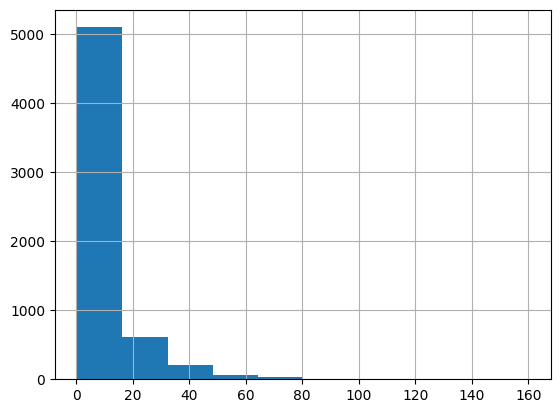

In [ ]:
%matplotlib inline
#creating histogram as the target variable is continuous
# This will help us to understand the distribution of the Price values
Used_Car_Data['Price'].hist()

Observations from step 4
* The data distribution of the target variable is skewed and is satisfactory to process further.
* There are sufficient number of rows for each type of values to learn from

**Step 5: Basic Exploratory Data Analysis**
* This step is performed to guage the overall data

In [ ]:
# Looking at sample rows in the data
Used_Car_Data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
# Looking at the sample rows in the data
Used_Car_Data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [ ]:
#Observing the summarized information of data
#Data types, missing values based on number of non-null values Vs total rows etc.
#Remove those variables from data which have too many missing values (Mssing values > 30%)
#Remove qualitative variables which cannot be used in machine learning
Used_Car_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
# Looking at the descriptive statistics of the data
Used_Car_Data.describe(include='all')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [ ]:
#Finging unique values for each column
#To understand which column is categorical and which one is continuous
#Typically if the numer of unique values are < 20 then the variable is likely to be category otherwise continuous
Used_Car_Data.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

**Step 7: Removing Unwanted Columns**

In [ ]:
# used for cleaning up the data frame by removing unneccessary colums and duplicate rows
Used_Car_Data.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
Used_Car_Data.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)
Used_Car_Data.duplicated().sum()

0

**Step 8: Visual Exploratory Data Analysis**

In [ ]:
pip install pandas matplotlib seaborn


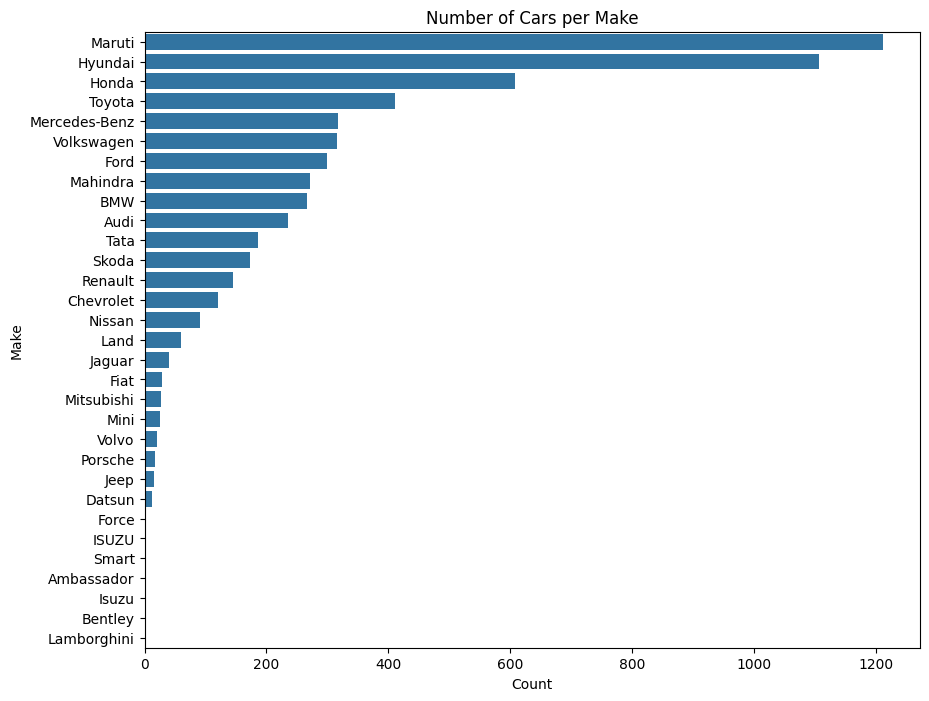

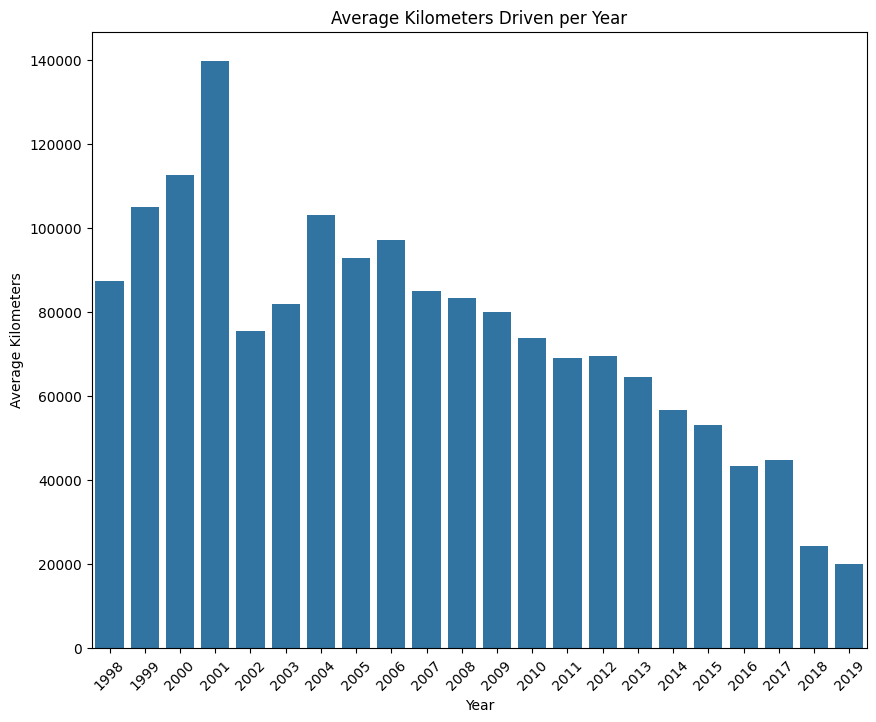

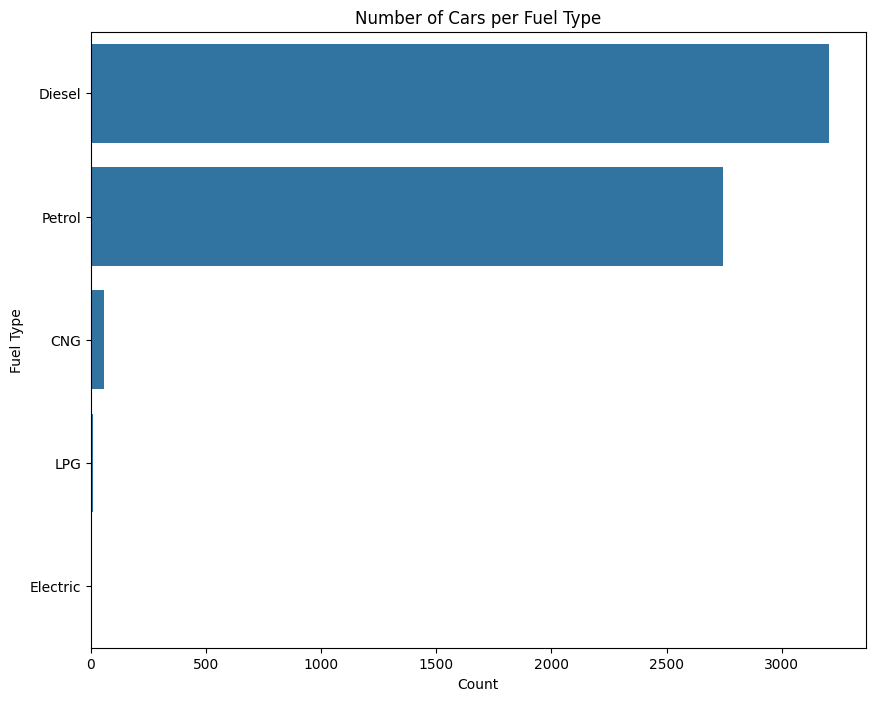

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/MyDrive/ST1_DATASET/train-data.csv'
used_car_data = pd.read_csv(file_path)

# Drop unnecessary columns if they exist to avoid KeyError
columns_to_drop = ['Unnamed: 0', 'New_Price']
used_car_data.drop(columns=[col for col in columns_to_drop if col in used_car_data.columns], inplace=True)

# Remove duplicate rows if any
used_car_data.drop_duplicates(inplace=True)

# Extract 'Make' from the 'Name' column for car makes
used_car_data['Make'] = used_car_data['Name'].apply(lambda x: x.split()[0])
car_make_count = used_car_data['Make'].value_counts().reset_index()
car_make_count.columns = ['Make', 'Count']

# Plot: Number of cars per Make
plt.figure(figsize=(10, 8))
sns.barplot(x="Count", y="Make", data=car_make_count)
plt.title("Number of Cars per Make")
plt.xlabel("Count")
plt.ylabel("Make")
plt.show()

# Assuming Kilometers_Driven as a proxy for insights, as actual price data wasn't specified
avg_km_year = used_car_data.groupby('Year')['Kilometers_Driven'].mean().reset_index()
avg_km_year.columns = ['Year', 'Average Kilometers']

# Plot: Average Kilometers Driven per Year
plt.figure(figsize=(10, 8))
sns.barplot(x="Year", y="Average Kilometers", data=avg_km_year)
plt.title("Average Kilometers Driven per Year")
plt.xlabel("Year")
plt.ylabel("Average Kilometers")
plt.xticks(rotation=45)
plt.show()

# Count cars by Fuel Type
fuel_type_count = used_car_data['Fuel_Type'].value_counts().reset_index()
fuel_type_count.columns = ['Fuel_Type', 'Count']

# Plot: Number of cars per Fuel Type
plt.figure(figsize=(10, 8))
sns.barplot(x="Count", y="Fuel_Type", data=fuel_type_count)
plt.title("Number of Cars per Fuel Type")
plt.xlabel("Count")
plt.ylabel("Fuel Type")
plt.show()


**Step 9: Now Visualize distribution of all the continuous predictor variables in the data using histograms**

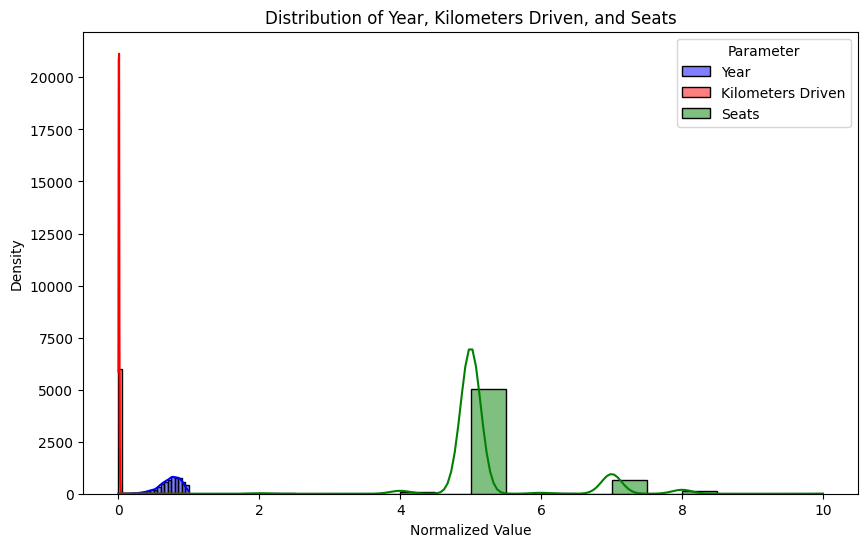

In [ ]:
# Normalize data to make it easier to compare on the same scale
used_car_data['Normalized Kilometers'] = (used_car_data['Kilometers_Driven'] - used_car_data['Kilometers_Driven'].min()) / (used_car_data['Kilometers_Driven'].max() - used_car_data['Kilometers_Driven'].min())
used_car_data['Normalized Year'] = (used_car_data['Year'] - used_car_data['Year'].min()) / (used_car_data['Year'].max() - used_car_data['Year'].min())

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(used_car_data['Normalized Year'], bins=20, color='blue', kde=True, label='Year')
sns.histplot(used_car_data['Normalized Kilometers'], bins=20, color='red', kde=True, label='Kilometers Driven')
sns.histplot(used_car_data['Seats'], bins=20, color='green', kde=True, label='Seats')  # Note: this may not be as meaningful if 'Seats' are categorical/discrete
plt.legend(title='Parameter')
plt.title('Distribution of Year, Kilometers Driven, and Seats')
plt.xlabel('Normalized Value')
plt.ylabel('Density')
plt.show()

**Step 10: Outlier Analysis**

In [ ]:
# Outlier analysis for 'Kilometers_Driven'
# Method 1: Using Z-Score
z_scores = np.abs((used_car_data['Kilometers_Driven'] - used_car_data['Kilometers_Driven'].mean()) / used_car_data['Kilometers_Driven'].std())
outliers_z = used_car_data[z_scores > 3]

# Method 2: Using IQR (Interquartile Range)
Q1 = used_car_data['Kilometers_Driven'].quantile(0.25)
Q3 = used_car_data['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = used_car_data[(used_car_data['Kilometers_Driven'] < (Q1 - 1.5 * IQR)) | (used_car_data['Kilometers_Driven'] > (Q3 + 1.5 * IQR))]

# Print outliers
print("Outliers using Z-Score method:")
print(outliers_z[['Name', 'Kilometers_Driven']])
print("\nOutliers using IQR method:")
print(outliers_iqr[['Name', 'Kilometers_Driven']])




Outliers using Z-Score method:
                                                 Name  Kilometers_Driven
340            Skoda Octavia Ambition Plus 2.0 TDI AT             775000
358                             Hyundai i10 Magna 1.2             620000
1860                 Volkswagen Vento Diesel Highline             720000
2328                        BMW X5 xDrive 30d M Sport            6500000
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT             480000
3092                             Honda City i VTEC SV             480000
4491                   Hyundai i20 Magna Optional 1.2             445000

Outliers using IQR method:
                                        Name  Kilometers_Driven
29       Toyota Innova 2.5 V Diesel 7-seater             262000
64                        Tata Indica V2 eLS             178000
77                      Toyota Innova 2.0 G1             230000
154      Skoda Superb Elegance 2.0 TDI CR AT             136997
164        Ford Ecosport 1.5 DV5 MT A

**Step 11: Visualising Data Distribution after outlier removal.**

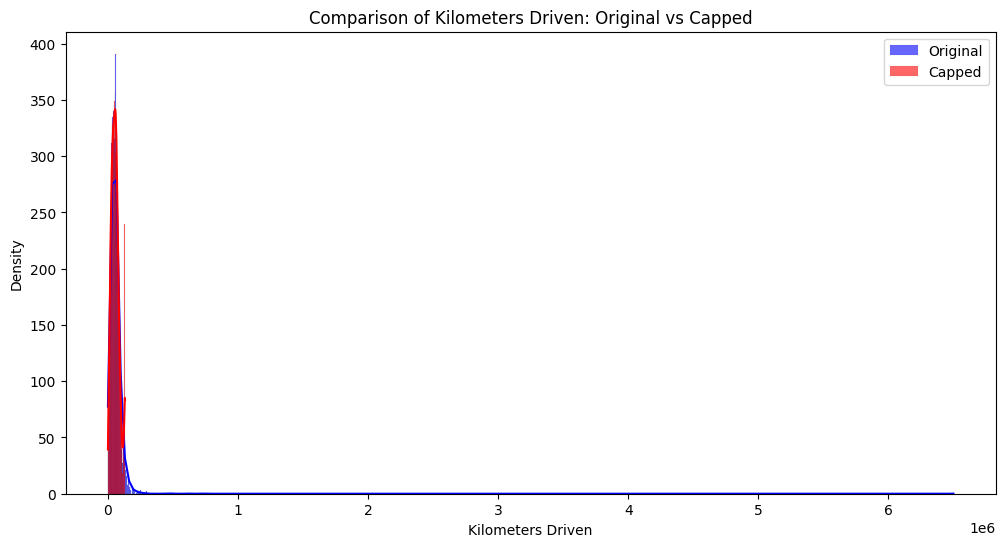

In [ ]:
# Calculate IQR and determine boundaries for outliers
Q1 = used_car_data['Kilometers_Driven'].quantile(0.25)
Q3 = used_car_data['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the nearest values within the IQR boundaries
used_car_data['Kilometers_Driven_Capped'] = used_car_data['Kilometers_Driven'].apply(
    lambda x: max(min(x, upper_bound), lower_bound)
)

# Check if the new column exists in the DataFrame
if 'Kilometers_Driven_Capped' in used_car_data.columns:
    # Visualization
    plt.figure(figsize=(12, 6))

    # Original Data Distribution
    sns.histplot(used_car_data['Kilometers_Driven'], color="blue", kde=True, label='Original', alpha=0.6)

    # Capped Data Distribution
    sns.histplot(used_car_data['Kilometers_Driven_Capped'], color="red", kde=True, label='Capped', alpha=0.6)

    plt.title('Comparison of Kilometers Driven: Original vs Capped')
    plt.xlabel('Kilometers Driven')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
else:
    print("The column 'Kilometers_Driven_Capped' was not created successfully.")


**Step 12: Missing Values Analysis**

In [ ]:
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/ST1_DATASET/train-data.csv'
used_car_data = pd.read_csv(file_path)

# Calculate missing values in each column
missing_values = used_car_data.isna().sum()

# Print the number of missing values for each column
print("Number of missing values for each column:")
print(missing_values)


Number of missing values for each column:
Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


**Handling the missing values**

In [ ]:
# Remove 'New_Price' if not required (due to high number of missing values)
used_car_data.drop(columns=['New_Price'], inplace=True)

# Convert 'Mileage', 'Engine', and 'Power' to numeric values, removing units
used_car_data['Mileage'] = used_car_data['Mileage'].str.extract('(\d+\.\d+)').astype(float)
used_car_data['Engine'] = used_car_data['Engine'].str.extract('(\d+)').astype(float)
used_car_data['Power'] = used_car_data['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Fill missing numeric values with the median for 'Mileage', 'Engine', 'Power'
for column in ['Mileage', 'Engine', 'Power']:
    median_value = used_car_data[column].median()
    used_car_data[column].fillna(median_value, inplace=True)

# Verify missing values after handling
print("\nMissing values after handling:")
print(used_car_data.isna().sum())



Missing values after handling:
Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


**Step 13: Feature Selection (Attribute Selection)**

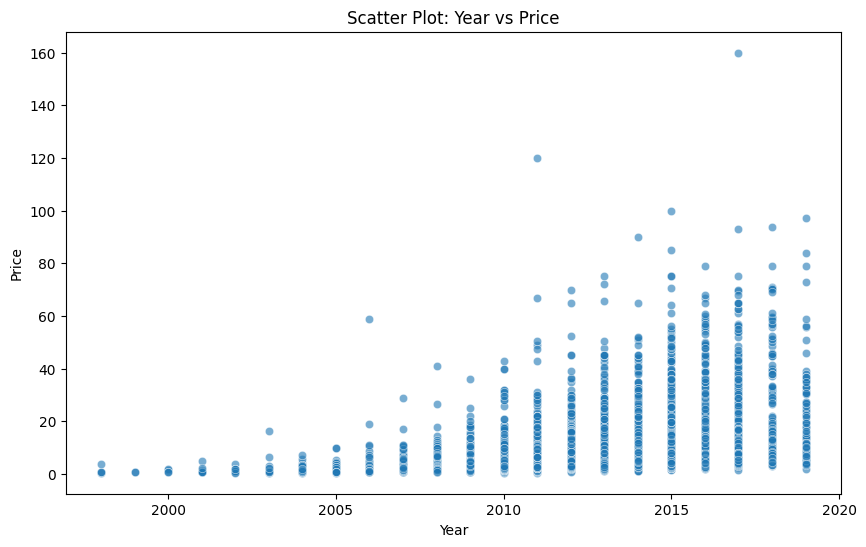

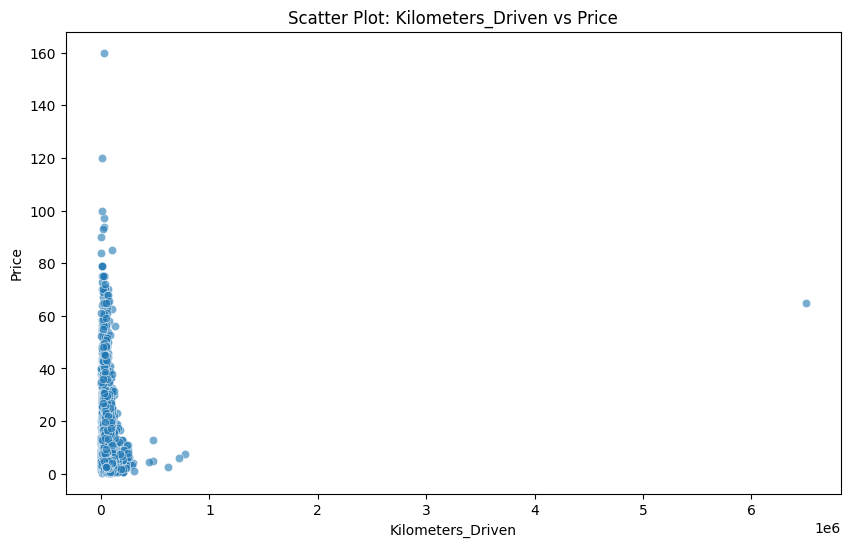

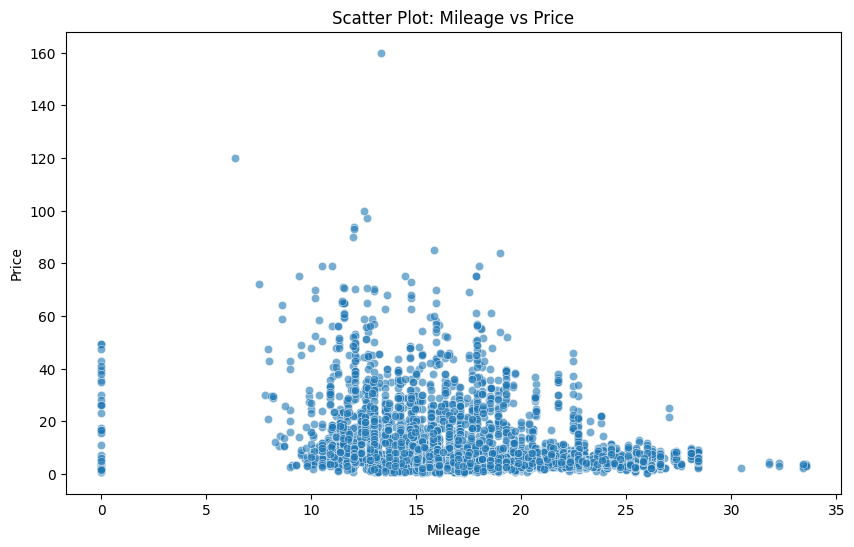

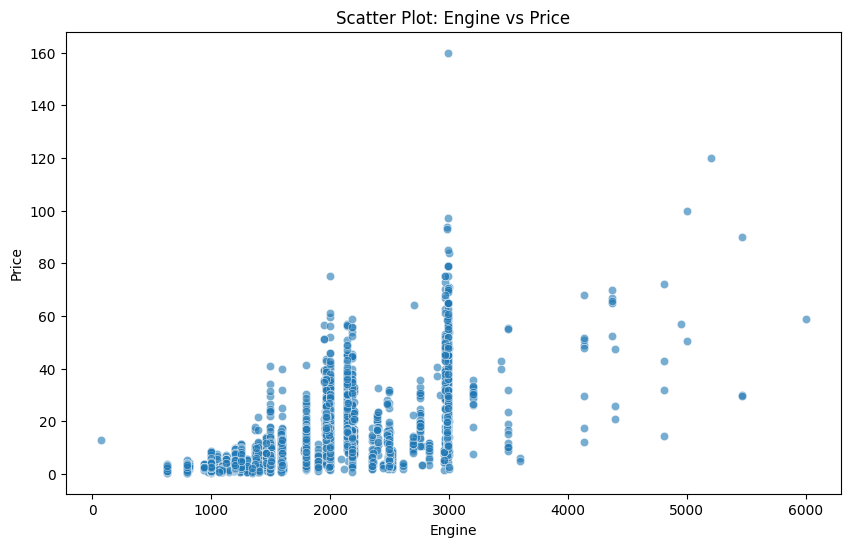

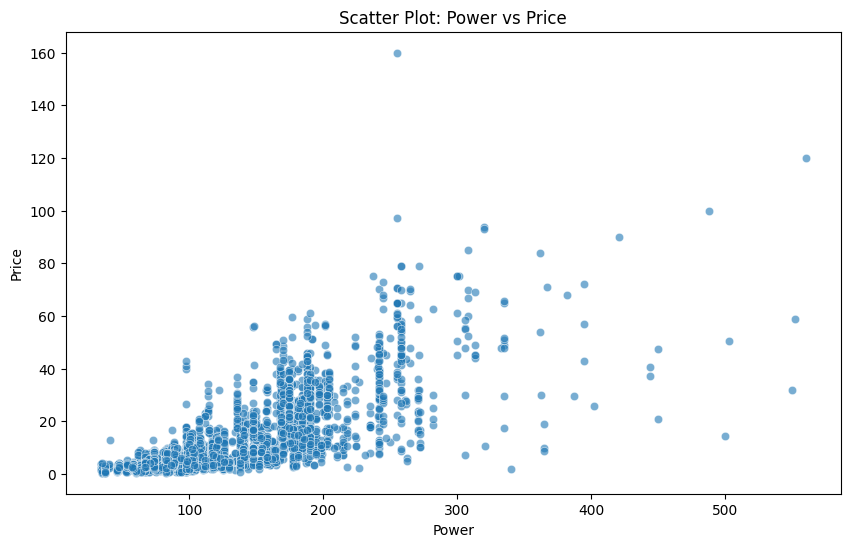

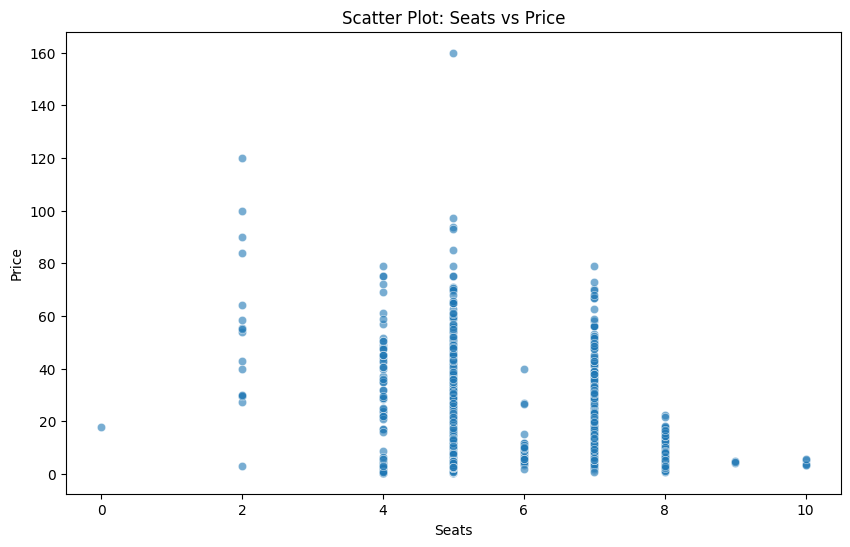

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/MyDrive/ST1_DATASET/train-data.csv'
used_car_data = pd.read_csv(file_path)

# Check and drop any columns not used as predictors or if they contain high missing values
if 'New_Price' in used_car_data.columns:
    used_car_data.drop(columns=['New_Price'], inplace=True)

# Convert 'Mileage', 'Engine', and 'Power' to numeric values, removing units
used_car_data['Mileage'] = used_car_data['Mileage'].str.extract('(\d+\.\d+)').astype(float)
used_car_data['Engine'] = used_car_data['Engine'].str.extract('(\d+)').astype(float)
used_car_data['Power'] = used_car_data['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Fill missing values if any remain (using median for numerical columns)
numeric_columns = ['Mileage', 'Engine', 'Power', 'Seats']
for column in numeric_columns:
    if used_car_data[column].isna().any():
        median_value = used_car_data[column].median()
        used_car_data[column].fillna(median_value, inplace=True)

# List of predictor variables (excluding any identifiers or non-predictive information)
predictors = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

# Create scatter plots for each predictor against the 'Price'
for predictor in predictors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=used_car_data, x=predictor, y='Price', alpha=0.6)
    plt.title(f'Scatter Plot: {predictor} vs Price')
    plt.xlabel(predictor)
    plt.ylabel('Price')
    plt.show()

**Step 14: Statistical Feature Selection (Continuous vs Continuous) using Correlation value.**

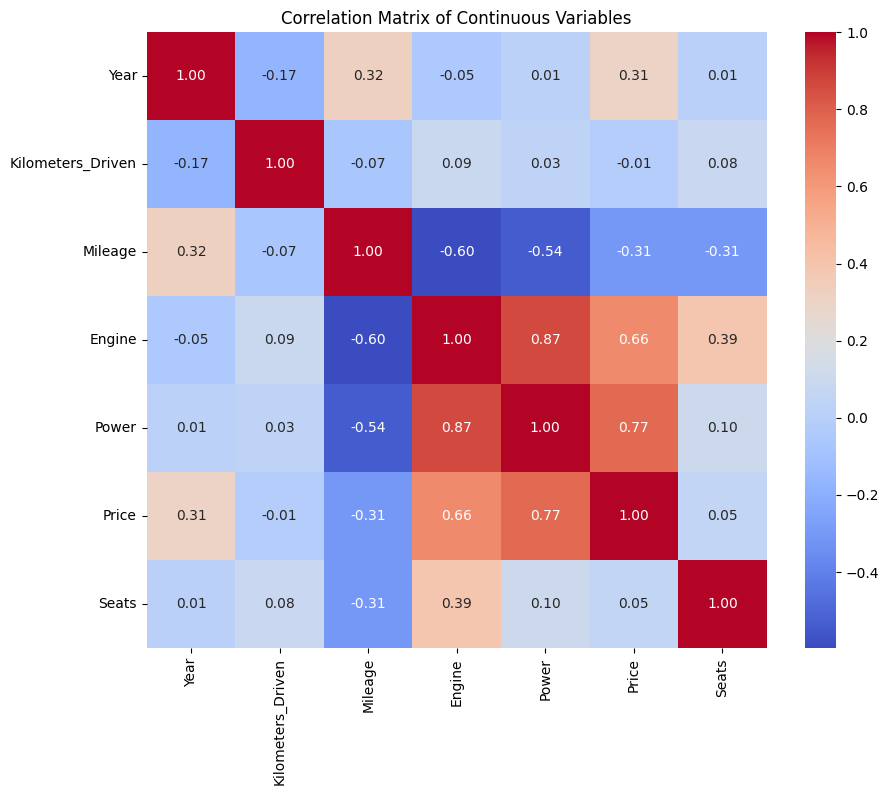

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/ST1_DATASET/train-data.csv'
used_car_data = pd.read_csv(file_path)

# Convert 'Mileage', 'Engine', and 'Power' to numeric values, removing units
used_car_data['Mileage'] = used_car_data['Mileage'].str.extract('(\d+\.\d+)').astype(float)
used_car_data['Engine'] = used_car_data['Engine'].str.extract('(\d+)').astype(float)
used_car_data['Power'] = used_car_data['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Selecting only the continuous variables for correlation analysis
continuous_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Seats']
continuous_data = used_car_data[continuous_columns]

# Calculate the correlation matrix
corr_matrix = continuous_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()


**Step 15: Relationship Exploration: Categorical vs Continuous -- Box Plots.**

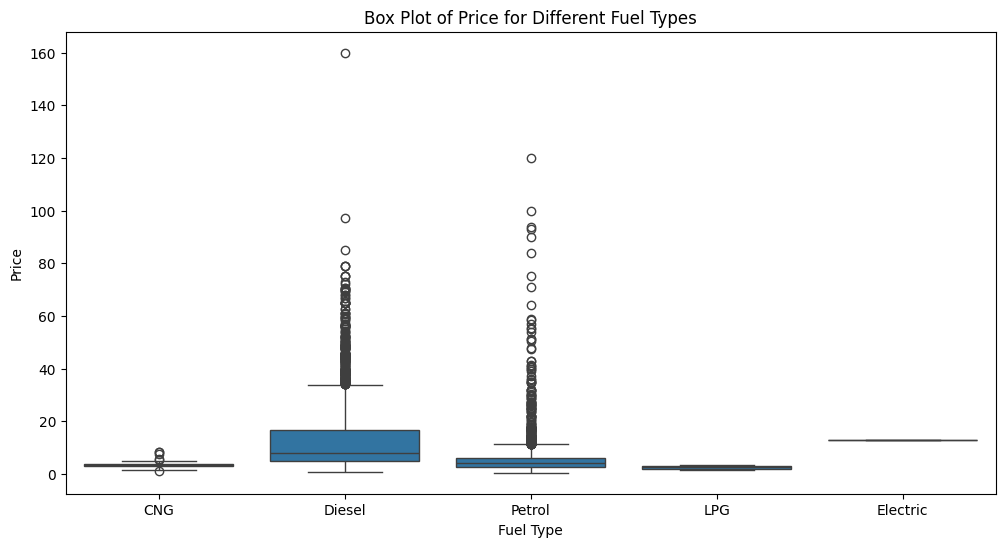

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/ST1_DATASET/train-data.csv'
used_car_data = pd.read_csv(file_path)

# Convert 'Price' to a numeric value, if it's not already
# This step is just a precaution, ensure your 'Price' column is appropriate for plotting
used_car_data['Price'] = pd.to_numeric(used_car_data['Price'], errors='coerce')

# Drop rows with missing 'Price' or 'Fuel_Type' as these are necessary for our analysis
used_car_data.dropna(subset=['Price', 'Fuel_Type'], inplace=True)

# Creating box plots for 'Price' across different 'Fuel_Type'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=used_car_data)
plt.title('Box Plot of Price for Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


**Step 16: Statistical Feature Selection (Categorical vs Continuous) using ANOVA test.**

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# Load the data
file_path = '/content/drive/MyDrive/ST1_DATASET/train-data.csv'
used_car_data = pd.read_csv(file_path)

# Ensure 'Price' is a numeric column
used_car_data['Price'] = pd.to_numeric(used_car_data['Price'], errors='coerce')

# Dropping rows with missing values in 'Price' or 'Fuel_Type' to ensure clean data for the test
used_car_data.dropna(subset=['Price', 'Fuel_Type'], inplace=True)

# Group data by 'Fuel_Type' and collect 'Price' for each group
grouped = used_car_data.groupby('Fuel_Type')['Price'].apply(list)

# Perform ANOVA test
f_value, p_value = stats.f_oneway(*grouped)

# Output the results
print(f"ANOVA test results for Price across different Fuel Types:")
print(f"F-Value: {f_value}, P-Value: {p_value}")


ANOVA test results for Price across different Fuel Types:
F-Value: 173.45164177692007, P-Value: 8.146026879615981e-141


**Selecting final Predictors/Features for building Machine Learning/AI Model**

In [ ]:
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/ST1_DATASET/train-data.csv'
data = pd.read_csv(file_path)

# Clean up the 'Mileage', 'Engine', and 'Power' columns by extracting numeric values
data['Mileage'] = data['Mileage'].str.extract('(\d+\.\d+)').astype(float)
data['Engine'] = data['Engine'].str.extract('(\d+)').astype(float)
data['Power'] = data['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Fill missing values with median for these columns if there are any
for col in ['Mileage', 'Engine', 'Power', 'Seats']:
    if data[col].isna().any():
        data[col].fillna(data[col].median(), inplace=True)

# Example list of selected columns after feature selection
selected_columns = ['Year', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']  # Customize this list based on your feature selection outcome

# Create a new DataFrame using only the selected columns
data_for_ml = data[selected_columns]

# Display the first few rows of the new DataFrame
print(data_for_ml.head())


   Year  Mileage  Engine   Power  Seats  Price
0  2010    26.60   998.0   58.16    5.0   1.75
1  2015    19.67  1582.0  126.20    5.0  12.50
2  2011    18.20  1199.0   88.70    5.0   4.50
3  2012    20.77  1248.0   88.76    7.0   6.00
4  2013    15.20  1968.0  140.80    5.0  17.74


In [ ]:
data_for_ml.to_pickle('data_for_ml.pkl')

**Step 17: Data Pre-Processing for Machine Learning Model Building or Model Development.**

In [ ]:
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/ST1_DATASET/train-data.csv'
data = pd.read_csv(file_path)

# Clean up the 'Mileage', 'Engine', and 'Power' columns by extracting numeric values
data['Mileage'] = data['Mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
data['Engine'] = data['Engine'].str.extract('(\d+)').astype(float)
data['Power'] = data['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Identify categorical columns you want to convert using get_dummies
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type']

# Applying get_dummies() to the categorical columns and dropping the first to avoid dummy variable trap
data_dummies = pd.get_dummies(data[categorical_cols], drop_first=True)

# Concatenate the original data frame with the new dummy variables (excluding original categorical columns)
data = pd.concat([data.drop(categorical_cols, axis=1), data_dummies], axis=1)

# Handle missing values: fill with the median of each column if there are any missing values
for col in data.columns:
    if data[col].dtype in ['float64', 'int64'] and data[col].isna().any():
        data[col].fillna(data[col].median(), inplace=True)

# Optionally, display the first few rows to verify
print(data.head())


   Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven  Mileage  Engine   Power  Seats  New_Price  Price  \
0              72000    26.60   998.0   58.16    5.0        NaN   1.75   
1              41000    19.67  1582.0  126.20    5.0        NaN  12.50   
2              46000    18.20  1199.0   88.70    5.0  8.61 Lakh   4.50   
3              87000    20.77  1248.0   88.76    7.0        NaN   6.00   
4              40670    15.20  1968.0  140.80    5.0        NaN  17.74   

   Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
0             False               False          False          

**Step 18: Machine Learning Model Development.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = '/content/drive/MyDrive/ST1_DATASET/train-data.csv'
data = pd.read_csv(file_path)

# Remove columns with text data that are not relevant or cannot be converted
if 'Name' in data.columns:
    data.drop('Name', axis=1, inplace=True)

# Convert 'Price' from '8.61 Lakh' to 861000 and so on if it is expressed in lakhs
if 'Price' in data.columns:
    data['Price'] = data['Price'].replace(r'[^\d.]', '', regex=True).astype(float) * 100000

# Convert other categorical variables to dummy variables
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']  # Including 'Location'
for col in categorical_cols:
    if col in data.columns:
        data = pd.get_dummies(data, columns=[col], drop_first=True)

# Convert relevant columns to numeric, handling non-numeric data with regex extraction and conversion to float
numeric_pattern_cols = {
    'Mileage': '(\d+\.\d+)',
    'Engine': '(\d+)',
    'Power': '(\d+\.\d+|\d+)'
}

for col, pattern in numeric_pattern_cols.items():
    if col in data.columns:
        data[col] = data[col].astype(str)  # Ensure the column is treated as string
        data[col] = pd.to_numeric(data[col].str.extract(pattern)[0], errors='coerce')

# Fill missing values with median for numeric columns only
data.fillna(data.median(numeric_only=True), inplace=True)

# Define predictors and target
X = data.drop('Price', axis=1)
y = data['Price']

# Scaling features
scaler = StandardScaler()


# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 173185042728.87598
R² Score: 0.8592672210290507


**Step 19: Standardization of Data**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = '/content/drive/MyDrive/ST1_DATASET/train-data.csv'
data = pd.read_csv(file_path)

# Assuming 'Price' is not a feature but the target, and it's not included in the features set
features = data.drop(['Price'], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
# Note: StandardScaler expects numerical data, ensure non-numeric columns are either dropped or converted
# Convert all string data to float if necessary and fill NaNs
for column in features.columns:
    if features[column].dtype == 'object':
        features[column] = pd.to_numeric(features[column].str.replace('[^\d.]', '', regex=True), errors='coerce')
features.fillna(features.mean(), inplace=True)

# Scale the features
features_scaled = scaler.fit_transform(features)

# Create a DataFrame from the scaled features for better visualization and further use
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Display the first few rows of the scaled features
print(features_scaled_df.head())


   Unnamed: 0      Name  Location      Year  Kilometers_Driven  Fuel_Type  \
0   -1.731763  0.000000       NaN -1.027139           0.145315        NaN   
1   -1.731188 -0.030006       NaN  0.502161          -0.194369        NaN   
2   -1.730612  0.000000       NaN -0.721279          -0.139581        NaN   
3   -1.730036  0.000000       NaN -0.415419           0.309678        NaN   
4   -1.729461 -0.030006       NaN -0.109559          -0.197985        NaN   

   Transmission  Owner_Type   Mileage    Engine     Power     Seats  \
0           NaN         NaN  1.847799 -1.039653 -1.035066 -0.345849   
1           NaN         NaN  0.335077 -0.065515  0.243242 -0.345849   
2           NaN         NaN  0.014197 -0.704376 -0.461293 -0.345849   
3           NaN         NaN  0.575192 -0.622642 -0.460166  2.135710   
4           NaN         NaN -0.640661  0.578351  0.517541 -0.345849   

      New_Price  
0  4.756763e-16  
1  4.756763e-16  
2 -1.567959e+00  
3  4.756763e-16  
4  4.756763e-16  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
import math

Basic Descriptive Statistics:
        Unnamed: 0         Year  Kilometers_Driven        Seats        Price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   3009.000000  2013.358199       5.873838e+04     5.278735     9.479468
std    1737.679967     3.269742       9.126884e+04     0.808840    11.187917
min       0.000000  1998.000000       1.710000e+02     0.000000     0.440000
25%    1504.500000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3009.000000  2014.000000       5.300000e+04     5.000000     5.640000
75%    4513.500000  2016.000000       7.300000e+04     5.000000     9.950000
max    6018.000000  2019.000000       6.500000e+06    10.000000   160.000000

Distribution of Numerical Data:


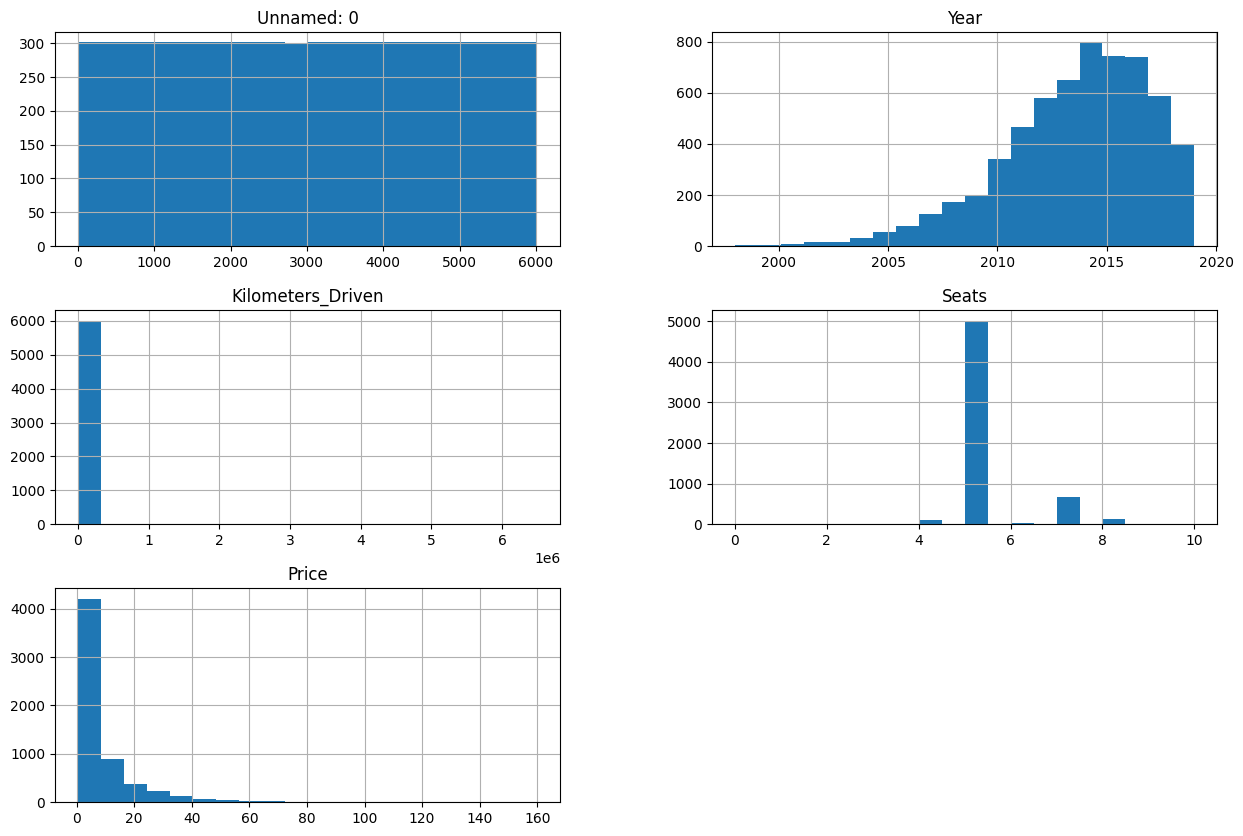


Boxplots for Each Numerical Feature:


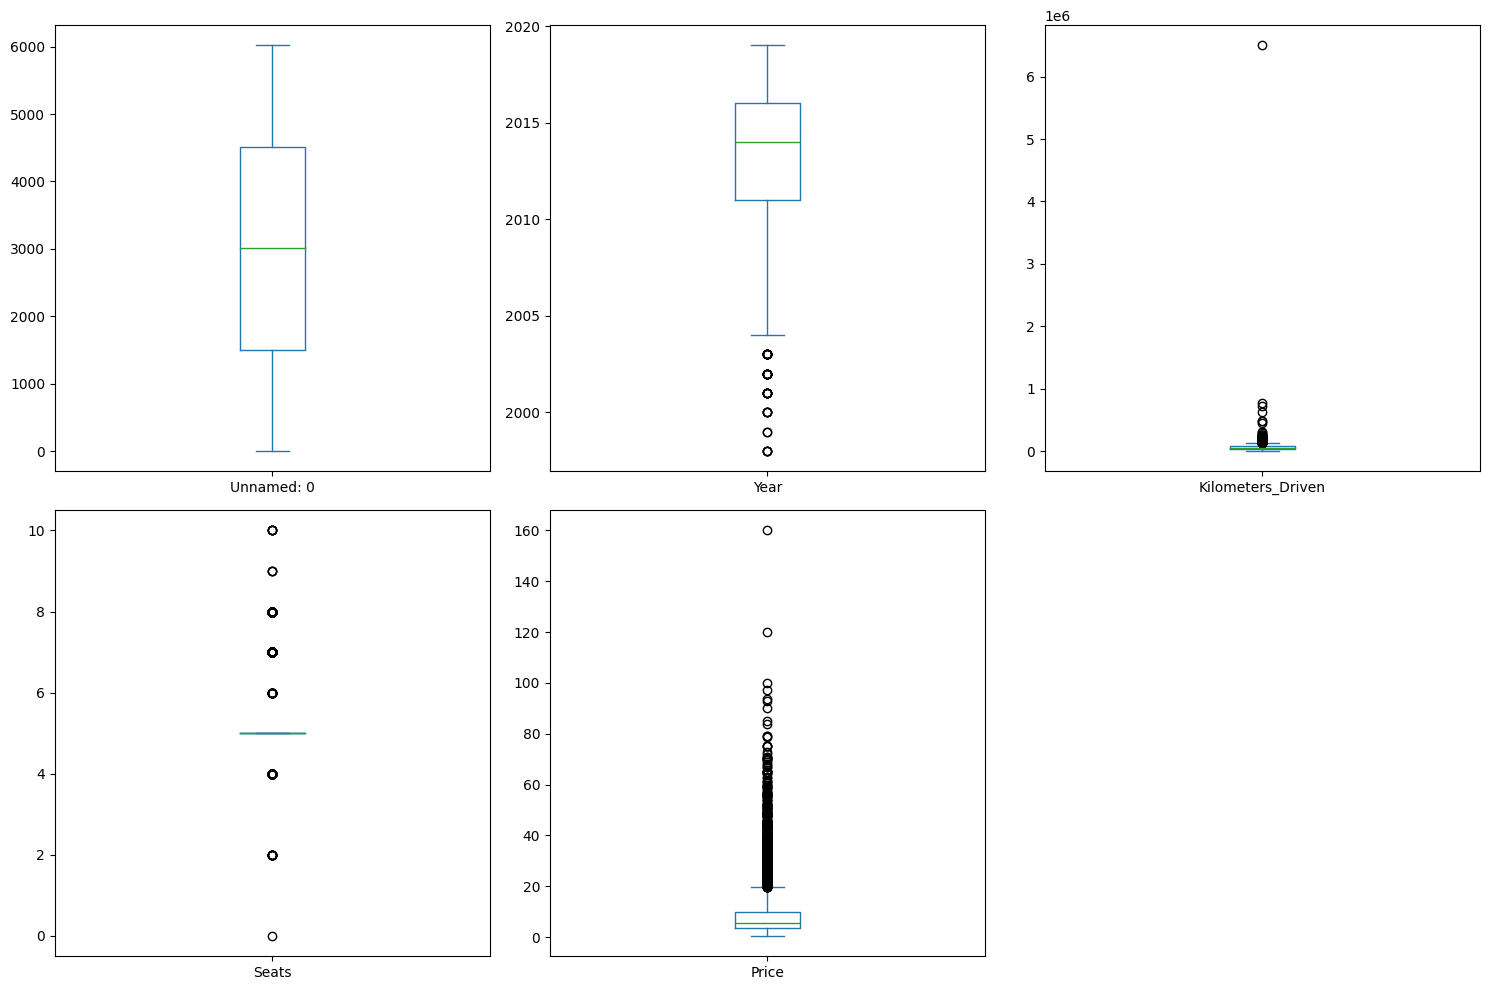


Missing Values Check:
Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Unique Values Count for Categorical Data:
Name has 1876 unique categories
Location has 11 unique categories
Fuel_Type has 5 unique categories
Transmission has 2 unique categories
Owner_Type has 4 unique categories
Mileage has 442 unique categories
Engine has 146 unique categories
Power has 372 unique categories
New_Price has 540 unique categories

Data Types:
Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Milea

In [ ]:
# Display basic descriptive statistics
print("Basic Descriptive Statistics:")
print(data.describe())

# Visualize the distribution of numerical data
print("\nDistribution of Numerical Data:")
data.hist(figsize=(15, 10), bins=20)
plt.show()

# Boxplot for each numerical feature to identify outliers
print("\nBoxplots for Each Numerical Feature:")
data.select_dtypes(include=['float64', 'int64']).plot(kind='box', subplots=True, layout=(math.ceil(len(data.select_dtypes(include=['float64', 'int64']).columns) / 3), 3), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

# Check for missing values
print("\nMissing Values Check:")
print(data.isnull().sum())

# Check unique values for categorical data
print("\nUnique Values Count for Categorical Data:")
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col} has {data[col].nunique()} unique categories")

# Ensure all columns have the appropriate data types
print("\nData Types:")
print(data.dtypes)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = '/content/drive/MyDrive/ST1_DATASET/train-data.csv'
data = pd.read_csv(file_path)

# Convert categorical variables to dummy variables and handle other preprocessing
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Assume 'Price' is the target and it's already cleaned for numeric conversion
data['Price'] = pd.to_numeric(data['Price'].replace(r'[^\d.]', '', regex=True), errors='coerce')

# Fill missing values with the median for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Define predictors and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Scaling features
scaler = StandardScaler()

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ridge_model.predict(X_test)

# Printing the predicted values
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(predictions_df.head())

# Optionally, evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


      Actual Price  Predicted Price
2868          5.75         2.658917
5924         10.08        13.875460
3764          7.85        13.168655
4144          2.40         5.585656
2780          1.60         3.470349
Mean Squared Error: 49.54773221531711
R² Score: 0.5971685399491289
